### 설치
- 아나콘다를 설치하셨다면, 별도 설치는 필요 없음
- -U 옵션은 업데이트 옵션

### 데이터 가져오기
- raw data 변환 및 데이터 전처리도 된 데이터로 이해하기로 함

> 모든 데이터는 pandas Dataframe 으로 처리되므로, pandas 사용법에 어느 정도 익숙해지지 않으면, 머신러닝에 집중하기 어려움
> 익숙하지 않다면, 처음하는 파이썬 데이터 분석 강의를 통해 pandas 와 EDA 기법 적용을 집중적으로 함께 익히세요~

> 본 코드는 sk-learn 공식 문서에 기반한 예
https://scipy-lectures.org/packages/scikit-learn/index.html

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

### 데이터와 정답 (샘플)
- 실전 문제에서는 예측 성능을 높이기 위해, 모델에 데이터를 학습시키기 전, 매우 다양한 데이터 가공을 진행함
- 이러한 과정은 이후 실전 문제에서 익히기로 함
- 현 단계에서는 큰 그림으로 하나씩 이해하기로 함

In [2]:
digits['data'] # 각 이미지를 숫자화한 데이터

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
digits['target'] # 각 이미지에 대한 정답

array([0, 1, 2, ..., 8, 9, 8])

### 이미지 확인해보기
- 화면에 잘 보여주기 위해, 특별히 만든 코드로, 관련 코드는 현단계에서는 결과만 확인하기로 함

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline 
fig = plt.figure(figsize=(6, 6))  # 각 이미지 사이즈 설정 (6x6)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

### 훈련 집합과 테스트 집합 
- 실제는 훈련 집합이 있고, 예측해야할 데이터가 있음
- 훈련 집합을 정답이 있는 데이터와, 정답이 없는 데이터로 나눈 후에,
  - 머신러닝 모델을 정답이 있는 데이터로 학습시키고
  - 정답이 없는 데이터로 예측을 시킨 후,
  - 실제 정답과 비교해서, 예측 성능 측정
  - 이를 기반으로, 다양한 방법을 통해, 예측 성능 개선

### 훈련 집합을 기반으로 테스트 집합 만들기
> 역시 현단계에서는 코드는 신경쓰지 마세요
- train_test_split() 리턴값
  - X_train: 랜덤하게 뽑은 data
  - X_test: 나머지 data
  - y_train: 랜덤하게 뽑은 X_train 데이터에 대한 정답
  - y_test: 나머지 X_test 데이터에 대한 정답

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

### 모델로 예측
> 실제 예측 코드는 단 3줄
1. 모델 생성
2. 학습
3. 예측

#### 1. 모델 생성
- 파이썬 프로그래밍으로 말하면, 객체 생성

In [6]:
from sklearn.naive_bayes import GaussianNB

# 확률 분야의 Bayesian 정리를 기반으로 수학 기법이 추가된 모델식
# 동일한 원리를 기반으로 하더라도, 다양한 수학 기법이 추가된 모델들이 있을 수 있음

OneOfNavieBayesianModels = GaussianNB()

#### 2. 학습
> 단, 한줄

In [7]:
OneOfNavieBayesianModels.fit(X_train, y_train)

GaussianNB()

#### 3. 예측
- 예측한 정답을 리턴함

In [8]:
predicted = OneOfNavieBayesianModels.predict(X_test)

### 성능 평가를 하고 싶다면...
> 다음 코드는 특수한 코드로 눈으로도 볼 수 있도록 하는 코드이지만, 보통은 다양한 성능 평가식을 통해 예측 성능 평가

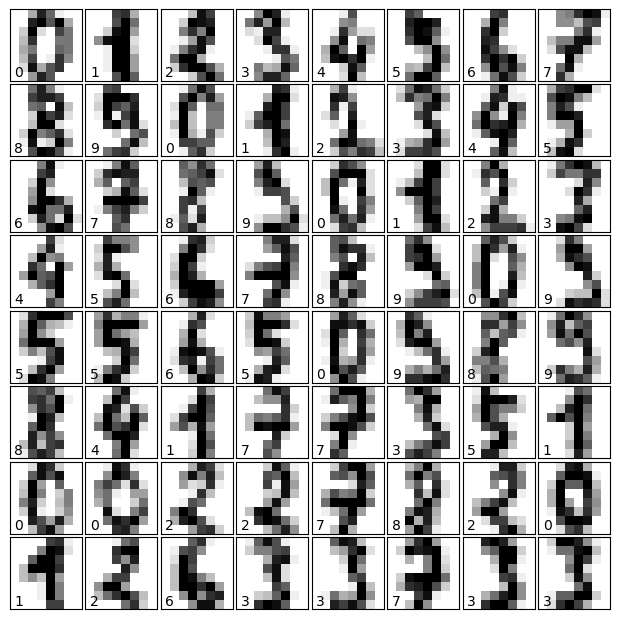

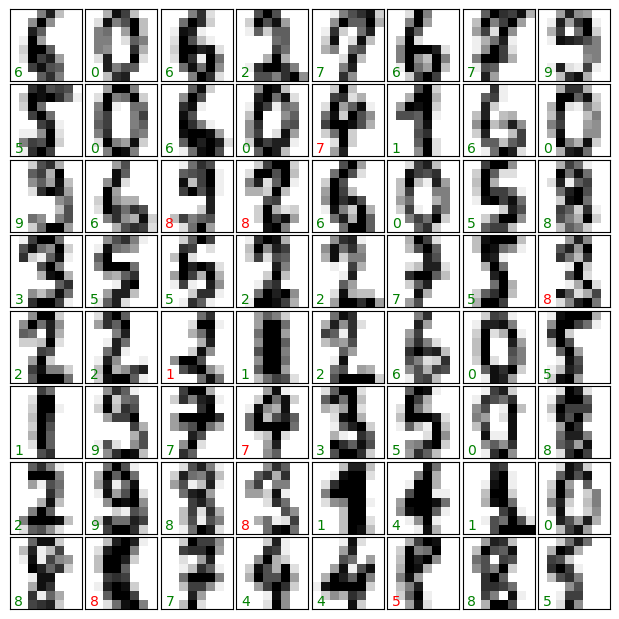

In [9]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == y_test[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

# 2025.02.10 업데이트
# 최근 버전에서는 그림 출력시 명시적으로 다음 코드를 넣어야 함 
plt.show()        